In [1]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from data_processor import DataProcessor
from regressor import Regressor

In [10]:
ds = xr.open_dataset("../data.grib")
data = ds.t2m.to_numpy()

AUTOREG_SEQUENCE_LENGTH = 2
processor = DataProcessor(data)
latitude, longitude = processor.get_latitude_longitude()
X, y = processor.preprocess(AUTOREG_SEQUENCE_LENGTH)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [12]:
X_train.shape

(863, 1125, 1)

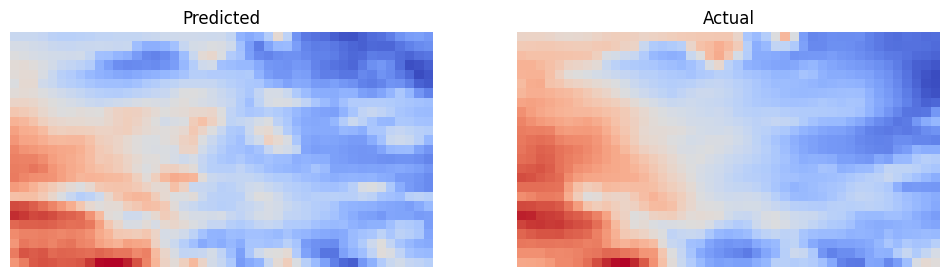

MSE: 3.2345534633856827; R2: 0.5226664264172236


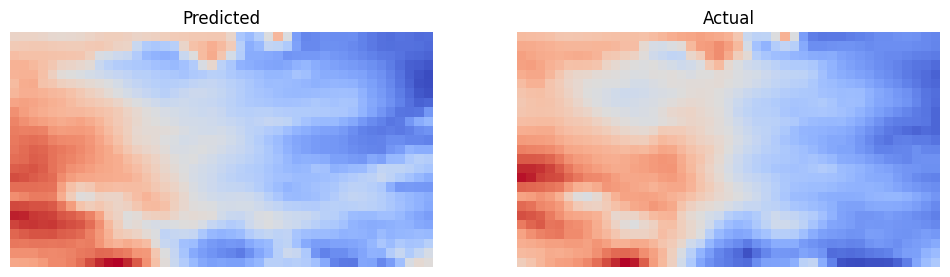

MSE: 0.9409512554807559; R2: 0.8413590781576302


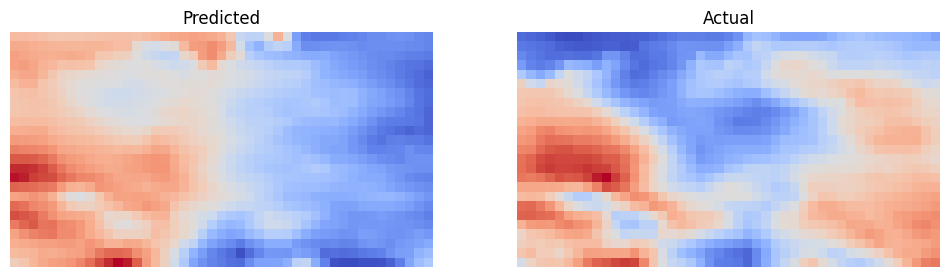

MSE: 50.21371080694684; R2: -13.291327026740444


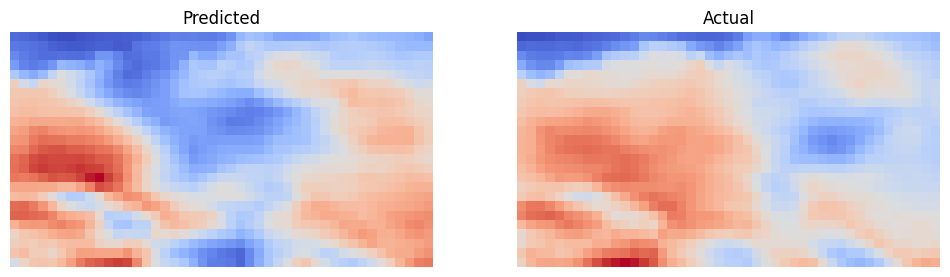

MSE: 31.438930099214364; R2: -4.125772884923455


In [11]:
resolution = (latitude, longitude)
linearreg = Regressor(resolution, AUTOREG_SEQUENCE_LENGTH)
linearreg.train(X_train, y_train)
linearreg.predict_and_evaluate(X_test, y_test, limit=4)

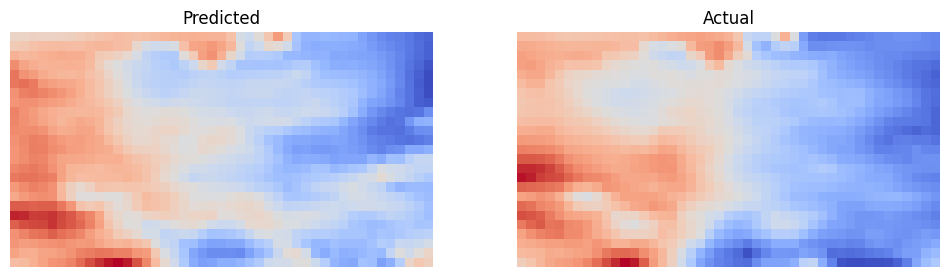

MSE: 1.425410941750988; R2: 0.7596809563870103


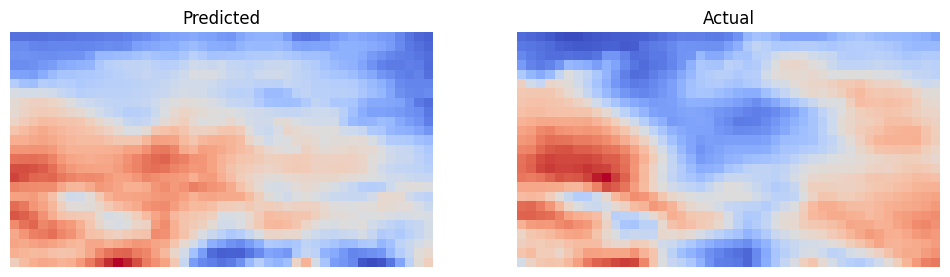

MSE: 4.623378502563117; R2: -0.315860012867043


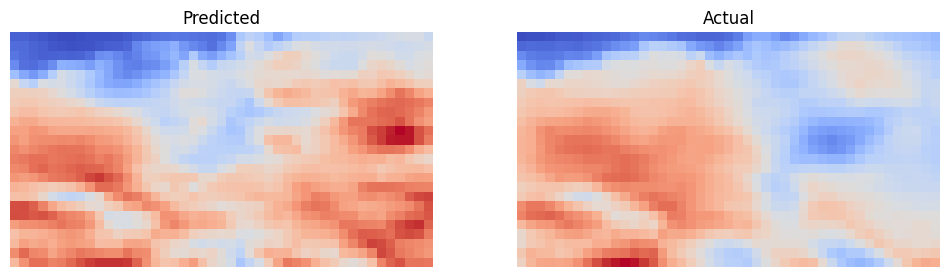

MSE: 9.345418443603796; R2: -0.5236680225859511


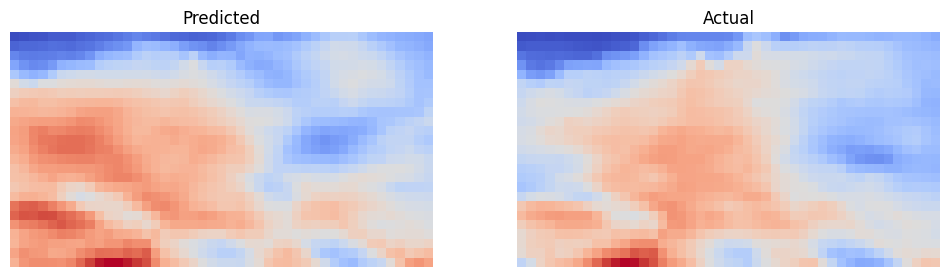

MSE: 2.3257641433446925; R2: 0.6042414155159135


In [3]:
resolution = (latitude, longitude)
linearreg = Regressor(resolution, AUTOREG_SEQUENCE_LENGTH)
linearreg.train(X_train, y_train)
linearreg.predict_and_evaluate(X_test, y_test, limit=4)

In [4]:
# plt.figure(figsize=(12,10))
# yy = y[0].reshape(1,-1)
# plt.imshow(yy[:,:10], cmap=plt.cm.coolwarm)
# plt.show()

In [5]:
class WeatherRegressor:
    def __init__(self):
        self.model = LinearRegression()
    
    def train(self, X_train, y_train):
        num_samples, latitude, longitude, ts, num_features = X_train.shape
        all_features = latitude * longitude * ts * num_features
        X_train_reshaped = X_train.reshape(num_samples, all_features)
        self.model.fit(X_train_reshaped, y_train)
    
    def predict(self, X):
        num_samples, latitude, longitude, ts = X.shape
        num_features = latitude * longitude * ts
        X_reshaped = X.reshape(num_samples, num_features)
        
        return self.model.predict(X_reshaped)

X_train = np.random.rand(100, 10, 10, 5, 5)  # Example 4D data with shape (num_samples, latitude, longitude, ts)
y_train = np.random.rand(100)

# Initialize and train the model
regressor = WeatherRegressor()
regressor.train(X_train, y_train)

# Make predictions
# X_test = np.random.rand(10, 10, 5)  # Example test data with the same dimensions (latitude, longitude, ts)
# predictions = regressor.predict(X_test)

In [6]:
np.array(X_train).shape

(100, 10, 10, 5, 5)